# Laboratorio 1 - Grupo 18 - Equipo 2

### Para el laboratorio 1 de la asignatura de Percepción Computacional, se ha desarrollado una función que permite eliminar el artefacto de "ojos rojos" de una fotografía. 

La corrección se realiza detectando los ojos de la persona en la foto. Una vez detectados, se compara el valor de cada pixel de la zona "ojos" del canal rojo con la media de los valores de los canales azul y verde. Si este ratio es mayor que un umbral, se reduce el valor de intensidad del canal rojo.

En el caso de que se quiera aplicar la función a una imagen de un animal cuyos ojos no se parecen a los humanos (p.ej. un gato), se puede probar a utilizar una función alternativa que corregirá el canal rojo de toda la imagen, aunque con la consecuente reducción de tonos rojos de toda la imagen.

---

Librerías necesarias:

In [31]:
import numpy as np
import cv2
import dlib
import site
import matplotlib.pyplot as plt
import os.path

### Para utilizar la función, se debe crear una instancia de la clase OjosRojos, proporcionando como parámetro la ruta en la que se encuentra la imagen. Después, se podrán usar las funciones para realizar la transformación o visualizar distintos elementos

In [51]:
class OjosRojos:
    '''A las instancias de esta clase, se les puede aplicar una transformación para corregir el artefacto de ojos rojos
    
    Funciones
    ---------
    - corregir_rojo : corregir ojos rojos, devuelve np.array en RGB
    - detectar_ojos : detectar ojos humanos, devuelve posiciones de los ojos
    - ver_roi : ver visualmente la posición de los ojos en la imagen (plot)
    - corregir_todo : corregir el rojo de toda la imagen para intentar reducir los ojos rojos si corregir_rojo no funciona, devuelve np.array en RGB
    - comparar : ver visualmente la imagen sin corregir al lado de la corregida (plot)
    '''
    
    def __init__(self, ruta: str):
        '''Función de inicialización de la clase OjosRojos
        
        Parámetros
        ----------
        ruta: path en el que se encuentra la imagen, str
        '''
        
        self.im_path = ruta
        
        
    def corregir_rojo(self):
        '''Función que corrige ojos rojos en una imagen

        Devuelve
        --------
        imagen_corregida
        
        Llama a la función detectar_ojos
        '''

        #Importar imagen
        img = cv2.imread(self.im_path)

        #llamar a la función que detecta los ojos
        ojos = self.detectar_ojos(img)

        #inicializar imagen_corregida
        imagen_corregida = img

        if np.any(ojos):
            #corregir balances
            for ojo in ojos:
                inicial_x = ojo[0]
                inicial_y = ojo[1]
                
                #iterar por los pixeles del ojo actual
                for delta in range(ojo[2]):
                    pos_x = inicial_x + delta

                    for delta2 in range(ojo[3]):
                        pos_y = inicial_y + delta2

                        #Condicion para evitar division por cero y eliminar el warning 1
                        if ((int(img[pos_y][pos_x][0]) + int(img[pos_y][pos_x][1])) / 2) >0 :
                            ratio = img[pos_y][pos_x][2] / ((int(img[pos_y][pos_x][0]) + int(img[pos_y][pos_x][1])) / 2) #canal R / la media de B y G

                            if ratio >=2:
                                imagen_corregida[pos_y][pos_x][2] = (int(img[pos_y][pos_x][0]) + int(img[pos_y][pos_x][1])) / 2

        else:
            #Si no hay ojos humanos
            print("No se han detectado ojos. Puede intentar aplicar la función corregir_todo")
            
        return cv2.cvtColor(imagen_corregida,cv2.COLOR_BGR2RGB)
    
    #----------------------------------------------------------------------------
    
    def detectar_ojos(self, imagen):
        '''Función que detecta la posición de los ojos en una imagen

        Parámetros
        ----------
        imagen: matriz CV_8U

        Devuelve
        --------
        ojos: ROI, [[x, y, width, height]]'''

        #archivos xml con el entrenamiento para detectar ojos
        eye_cascade = cv2.CascadeClassifier(os.path.join(os.path.dirname(cv2.__file__), 'data', 'haarcascade_eye.xml'))

        #convertir imagen a escala de grises para la detección
        gray = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)

        #detectar ojos. Parámetros: imagen, scaleFactor, minNeighbors 
        ojos = eye_cascade.detectMultiScale(gray, 1.3, 1)

        return ojos
    
    #----------------------------------------------------------------------------
    
    def ver_roi(self):
        '''Función para comprobar que los ROI sobre los que se está aplicando la tranformación de ojos rojos son correctos
        
        Llama a la función detectar_ojos'''
        
        #Importar imagen
        img = cv2.imread(self.im_path)

        #llamar a la función que detecta los ojos
        ojos = self.detectar_ojos(img)
        
        if np.any(ojos):
            for ojo in ojos:
                #Para ver los ROI
                cv2.line(img,(ojo[0],ojo[1]),(ojo[0]+ojo[2],ojo[1]),(255,0,0),5)
                cv2.line(img,(ojo[0]+ojo[2],ojo[1]),(ojo[0]+ojo[2],ojo[1]+ojo[3]),(255,0,0),5)
                cv2.line(img,(ojo[0]+ojo[2],ojo[1]+ojo[3]),(ojo[0],ojo[1]+ojo[3]),(255,0,0),5)
                cv2.line(img,(ojo[0],ojo[1]+ojo[3]),(ojo[0],ojo[1]),(255,0,0),5)
                cv2.imwrite("roi.jpg",img)
                
            plt.imshow(img);
        
        else:
            print("No se han detectado ojos")           
            
    #----------------------------------------------------------------------------
    
    def corregir_todo(self):
        '''Función que corrige el canal rojo en una imagen. Utilizar para imágenes de animales o cuando corregir_rojo no funciona correctamente

        Devuelve
        --------
        imagen_corregida
        '''

        #Importar imagen
        img = cv2.imread(self.im_path)

        #inicializar imagen_corregida
        imagen_corregida = img
        
        #iterar por toda la imagen
        for pixel in range(img.shape[0]):
            for pixel2 in range(img.shape[1]):
                if ((int(img[pixel][pixel2][0]) + int(img[pixel][pixel2][1])) / 2) >0 :
                    ratio = img[pixel][pixel2][2] / ((int(img[pixel][pixel2][0]) + int(img[pixel][pixel2][1])) / 2) #canal R / la media de B y G

                    if ratio >=2:
                        imagen_corregida[pixel][pixel2][2] = (int(img[pixel][pixel2][0]) + int(img[pixel][pixel2][1])) / 2

            
        return cv2.cvtColor(imagen_corregida,cv2.COLOR_BGR2RGB)
    
    #----------------------------------------------------------------------------
    
    def comparar(self, no_ojos=False):
        '''Función que muestra la imagen corregida y la imagen sin corregir en un plot de matplotlib
        
        Llama a la función corregir_rojo
        '''
        #imagenes:        
        imagen_original = cv2.cvtColor(cv2.imread(self.im_path),cv2.COLOR_BGR2RGB)
        if no_ojos:
            imagen_corregida = self.corregir_todo()
        else:
            imagen_corregida = self.corregir_rojo()
         
        #gráfica
        fig, ax = plt.subplots(1, 2, figsize = (25,15))

        ax[0].imshow(imagen_original)
        ax[1].imshow(imagen_corregida)

        ax[0].set_title('Imagen original', fontsize=30)
        ax[1].set_title('Imagen corregida', fontsize=30);


---

### Imágenes de prueba

#### Imagen 1

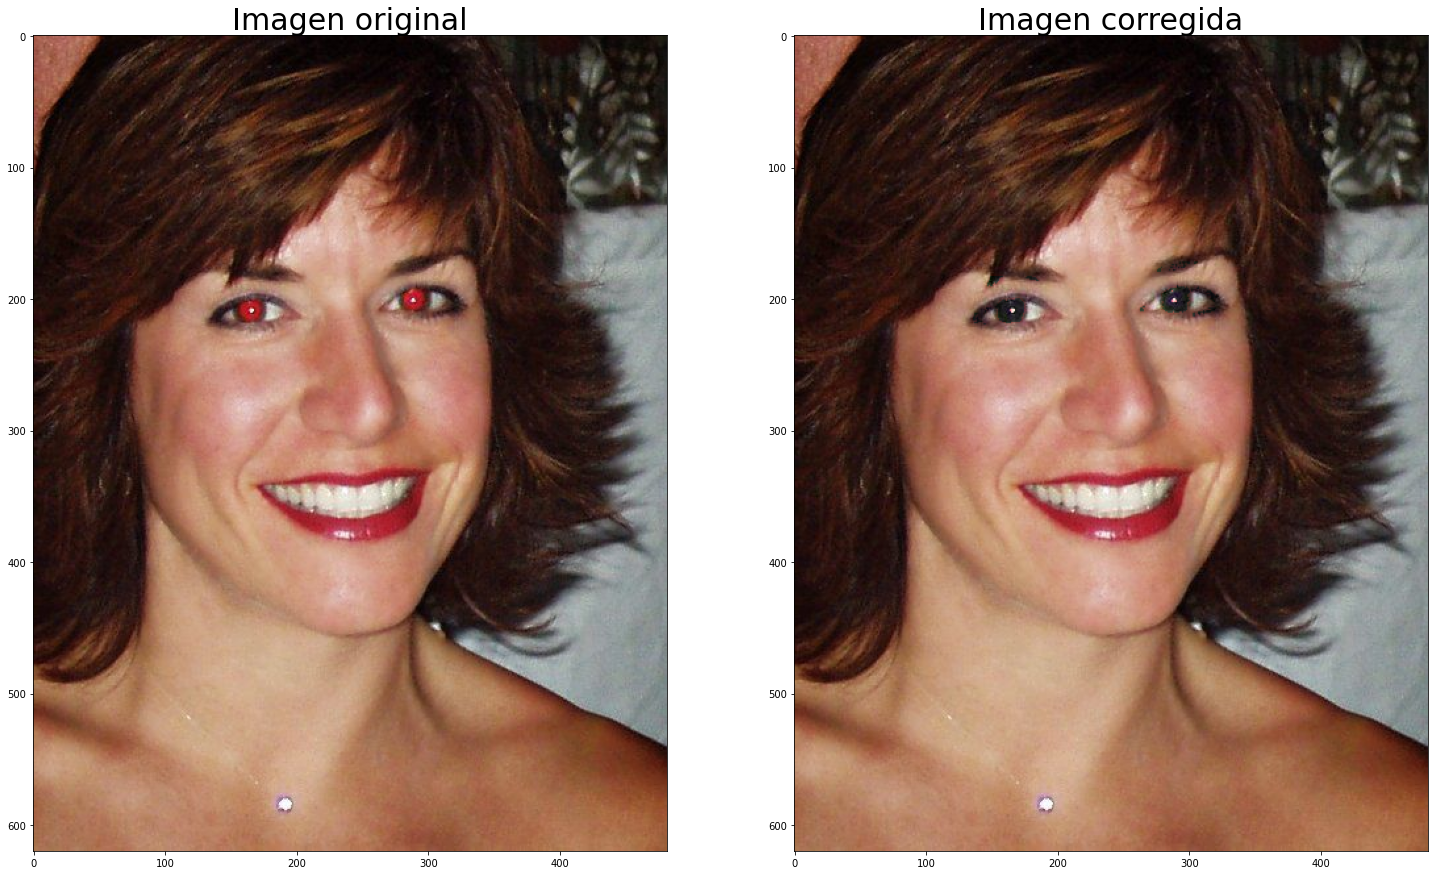

In [39]:
OjosRojos('ojos_rojos1.jpg').comparar()

#### Imagen 2

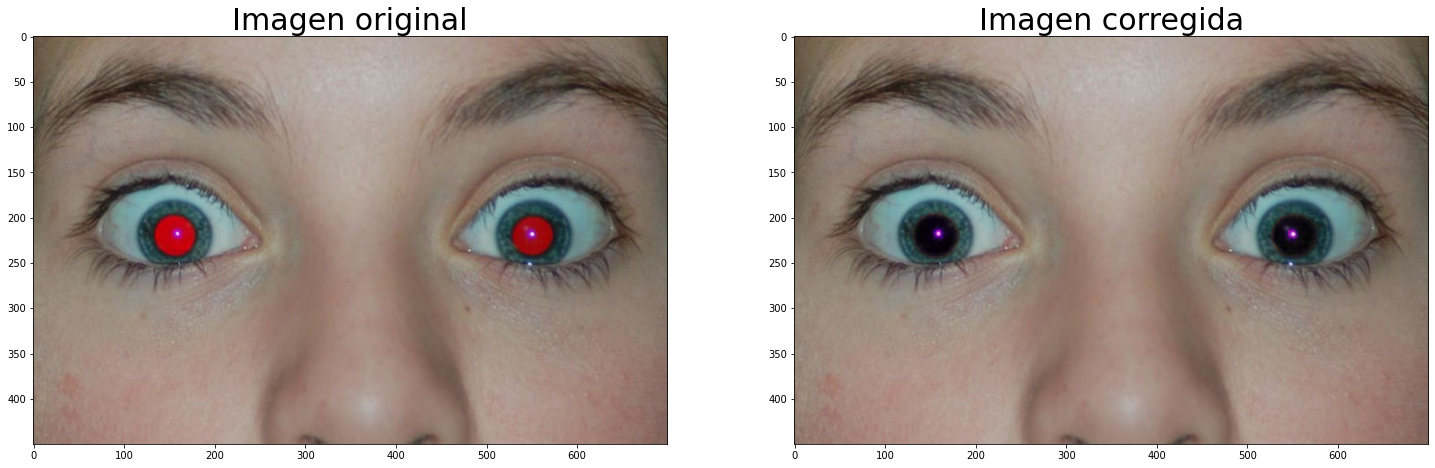

In [40]:
OjosRojos('ojos_rojos2.jpg').comparar()

#### Imagen 3

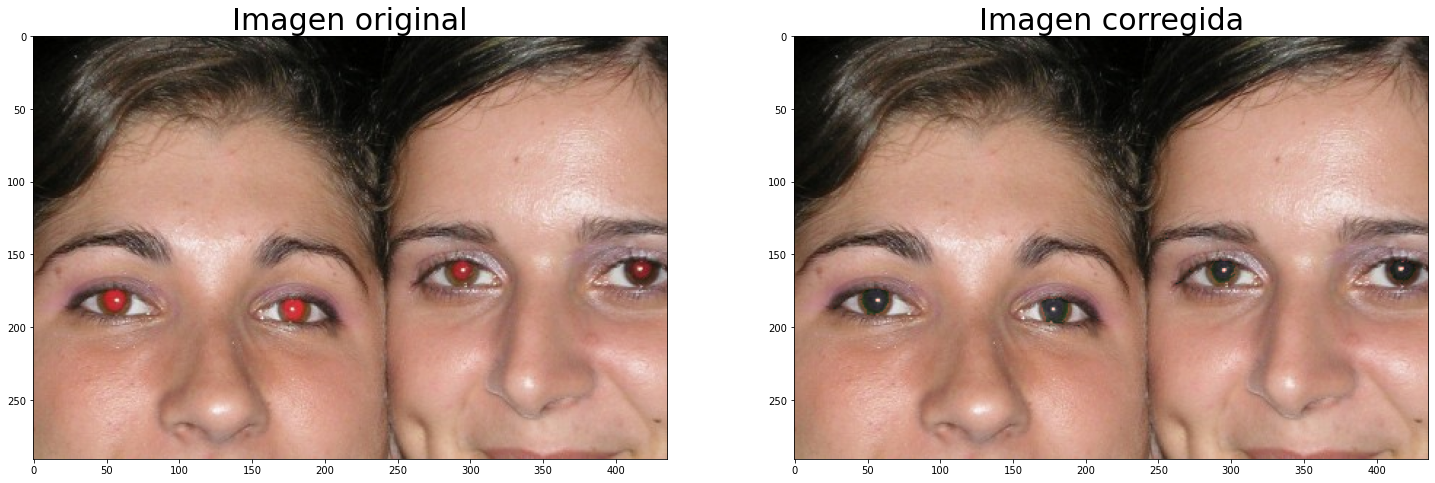

In [41]:
OjosRojos('ojos_rojos5.jpg').comparar()

#### Imagen 4

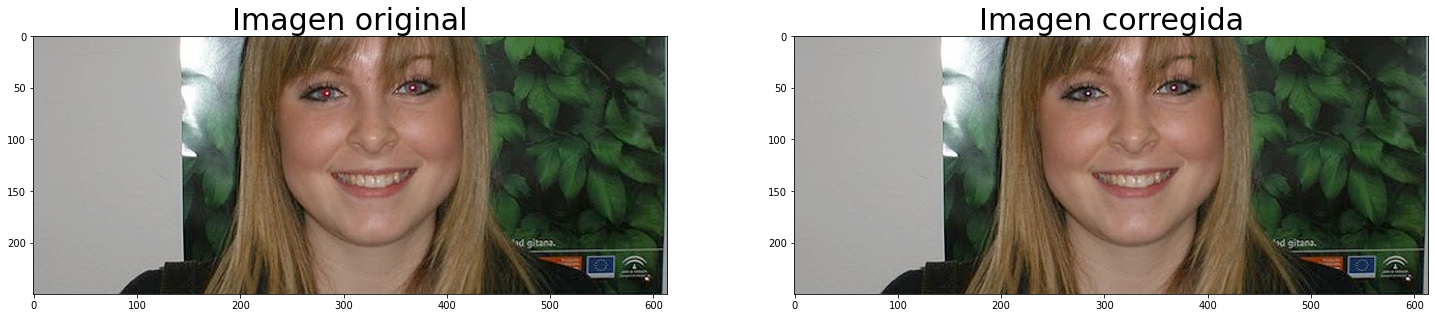

In [42]:
OjosRojos('ojos_rojos7.jpg').comparar()

---

### Animales

#### Imagen de un perro

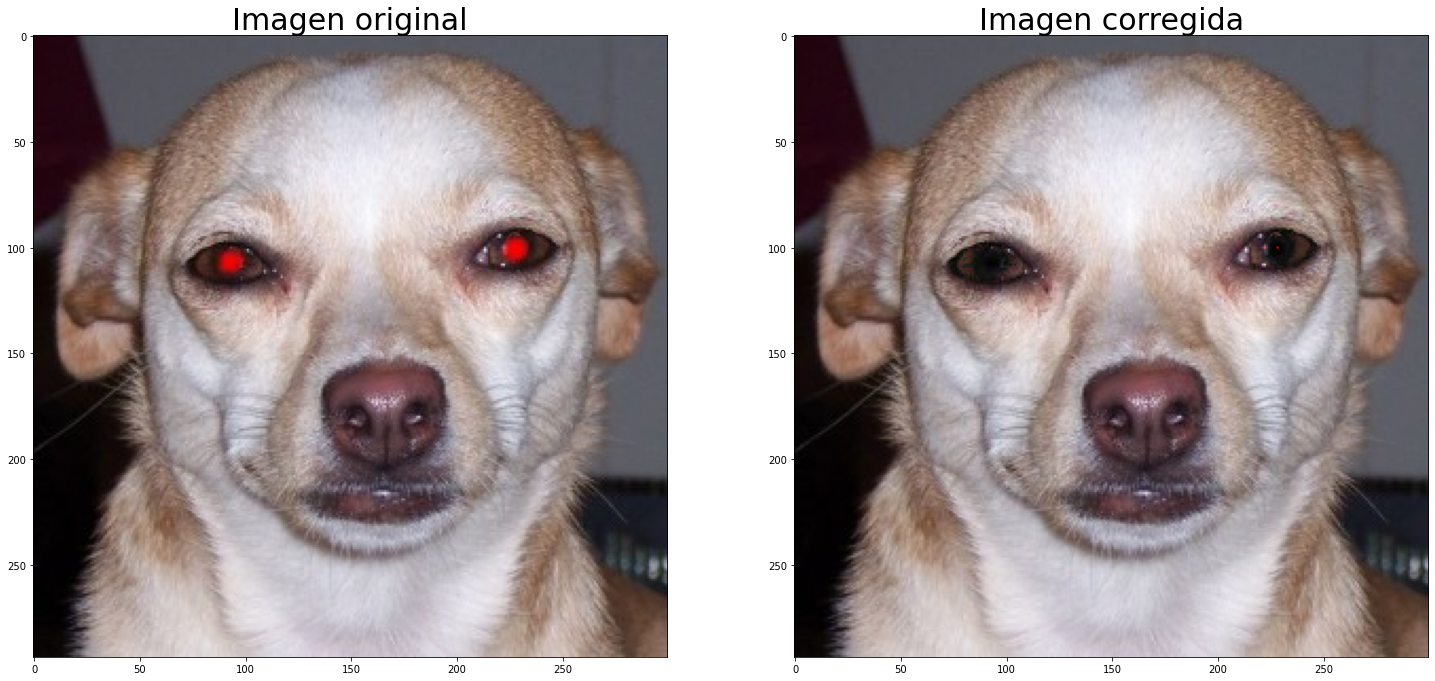

In [48]:
OjosRojos('ojos_rojos4.jpg').comparar()

#### Imagen de un gato

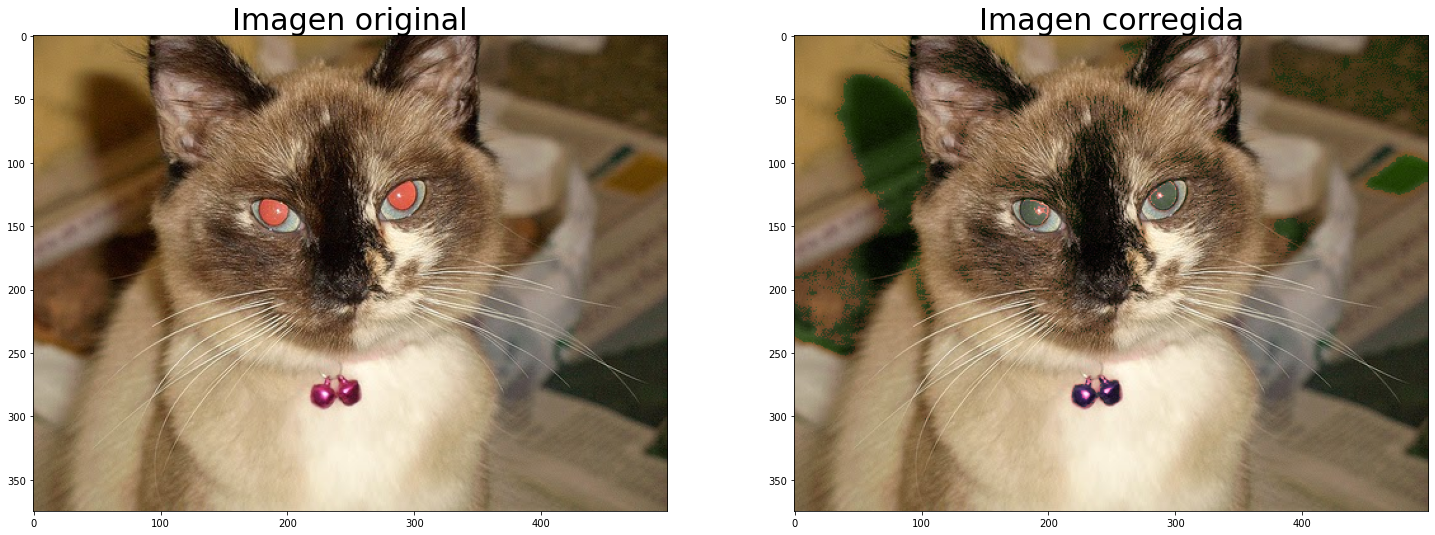

In [52]:
OjosRojos('ojos_rojos3.jpg').comparar(no_ojos=True)